#Information Retrieval Project

In this project, we want to use information retrieval concepts practically. The project is defined in two phases. In this project, we created a simple search engine to retrieve text documents in such way that the user enters their query and the system retrieves the related documents.

#Phase 1

##Importing hazm

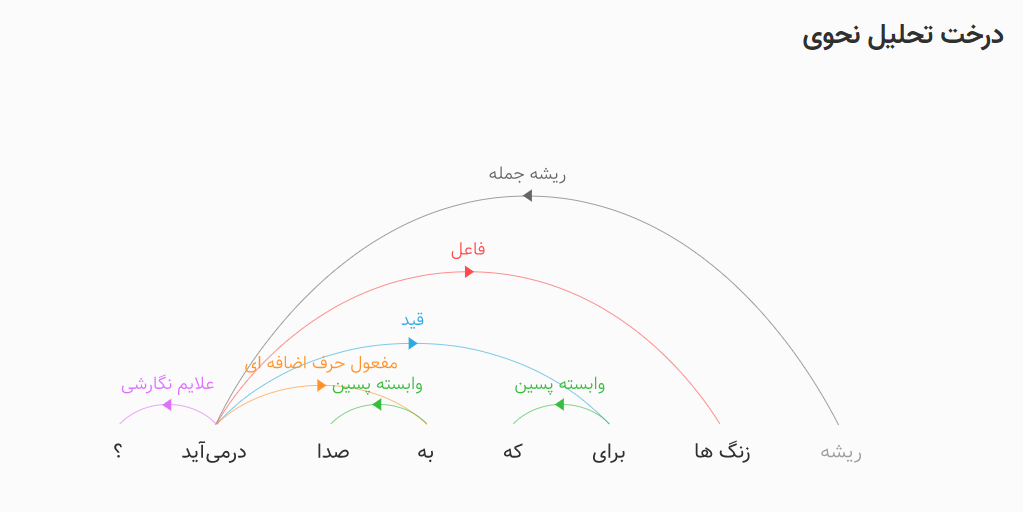

In [ ]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=1d236046244ad94b3ae55ae262ba19bc3f6ab1b3bd3c18372055969f01583b64
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=179575 sha256=d790b776d3194db562d1ac3123a1821858a500fb07e5cf01229ad6c6655784b6
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

**Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import collections
from hazm import *

##Pre-Processing data

**Reading JSON file and making a proper dataframe**

In [ ]:
df = pd.read_json('/content/drive/MyDrive/IR_data_news_12k.json') #farhan

In [ ]:
# df = pd.read_json('/content/drive/MyDrive/InformationRetrieval/IR_data_news_12k.json') #moujan

In [ ]:
df = df.transpose() #transposing dataframe so we can use the columns in the future.
df

,title,content,tags,date,url,category
0,اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا,\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آس...,"[اعلام زمان, قرعه‌کشی, قرعه‌کشی جام, قرعه‌کشی ...",3/15/2022 5:59:27 PM,https://www.farsnews.ir/news/14001224001005/اع...,sports
1,سجادی :حضور تماشاگران در لیگ برتر فوتبال تابع...,\nبه گزارش خبرگزاری فارس، سید حمید سجادی در حا...,"[سجادی, لیگ, فدراسیون, وزیر ورزش]",3/15/2022 5:30:07 PM,https://www.farsnews.ir/news/14001224000982/سج...,sports
2,محل برگزاری نشست‌های خبری سرخابی‌ها؛ مجیدی در ...,\nبه گزارش خبرگزاری فارس، نشست خبری پیش از مسا...,"[دربی 94, محل برگزاری, خبری سرخابی‌ها, مجیدی, ...",3/15/2022 5:20:01 PM,https://www.farsnews.ir/news/14001224000971/مح...,sports
3,ماجدی در نشست با صالحی امیری: امیدوارم در این ...,\nبه گزارش خبرگزاری فارس، سید رضا صالحی امیری...,"[کمیته امداد امام خمینی (ره), کمیته ملی المپیک...",3/15/2022 5:18:00 PM,https://www.farsnews.ir/news/14001224000964/ما...,sports
4,لیگ‌برتر بسکتبال|‌ نخستین پیروزی شهرداری گرگان...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، در نخس...,"[بسکتبال, لیگ برتر بسکتبال, شهرداری گرگان, تیم...",3/15/2022 5:16:41 PM,https://www.farsnews.ir/news/14001224000947/لی...,sports
...,...,...,...,...,...,...
12197,دفع حمله دزدان دریایی به دو نفتکش ایرانی توسط ...,\nبه گزارش گروه دفاعی خبرگزاری فارس، دریادار ش...,"[ارتش جمهوری اسلامی ایران, شهرام ایرانی, نیروی...",10/16/2021 6:25:36 PM,https://www.farsnews.ir/news/14000724000790/دف...,politics
12198,نقدی بر یادداشت «مرزبندی گفتمانی با طالبان»/ و...,\nخبرگزاری فارس ـ یادداشت میهمان ـ مسعود مرادی...,"[طالبان, یادداشت, گفتمان, جمهوری اسلامی ایران,...",10/16/2021 5:03:39 PM,https://www.farsnews.ir/news/14000724000611/نق...,politics
12199,روند تحقیق و تفحص از سازمان سنجش با جدیت ادامه...,\nبه گزارش خبرنگار پارلمانی خبرگزاری فارس، هیا...,"[مجلس شورای اسلامی, سازمان سنجش و آموزش کشور, ...",10/16/2021 4:54:47 PM,https://www.farsnews.ir/news/14000724000694/رو...,politics
12200,محسن اسلامی مدیرکل دفتر امور سیاسی وزارت کشور شد,\nبه گزارش خبرگزاری فارس به نقل از پایگاه اطلا...,"[وزارت کشور, احمد وحیدی, وزیر کشور, وزارت علوم...",10/16/2021 4:14:30 PM,https://www.farsnews.ir/news/14000724000651/مح...,politics


##Normalized list

E.g.

normalizer = Normalizer()

normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')

'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'

In [ ]:
size = df.content.size
normalizer = Normalizer()
normalize = [[]]*(size+1)
for i in range(size):
  normalize[i] = normalizer.normalize(df.content[i])

In [ ]:
normalize[0]

'\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آسیا (AFC) در نامه\u200cای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان قرعه کشی جام باشگاه\u200cهای فوتسال آسیا را رسما اعلام کرد. بر این اساس ۲۵ فروردین ماه ۱۴۰۱ مراسم قرعه کشی جام باشگاه\u200cهای فوتسال آسیا در مالزی برگزار می\u200cشود. باشگاه گیتی پسند بعنوان قهرمان فوتسال ایران در سال ۱۴۰۰ به این مسابقات راه پیدا کرده است. پیش از این گیتی پسند تجربه ۳ دوره حضور در جام باشگاه\u200cهای فوتسال آسیا را داشته که هر سه دوره به فینال مسابقات راه پیدا کرده و یک عنوان قهرمانی و دو مقام دومی بدست آورده است. انتهای پیام/\n\n'

**Punctuation list**

In [ ]:
punc = '''()-[]{};،:'"\, <>./?@#$%^&*_~'''
seperator = ['\xad', '\u200e','\u200f', '\u200d', '\u200d', '\u200d', '\u200c', '\n']
for i in range(size):
  for ele in normalize[i]:  
      if (ele in punc) or ele in seperator:  
          normalize[i] = normalize[i].replace(ele, " ")  
            
normalize[0]

' به گزارش خبرگزاری فارس  کنفدراسیون فوتبال آسیا  AFC  در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان قرعه کشی جام باشگاه های فوتسال آسیا را رسما اعلام کرد  بر این اساس ۲۵ فروردین ماه ۱۴۰۱ مراسم قرعه کشی جام باشگاه های فوتسال آسیا در مالزی برگزار می شود  باشگاه گیتی پسند بعنوان قهرمان فوتسال ایران در سال ۱۴۰۰ به این مسابقات راه پیدا کرده است  پیش از این گیتی پسند تجربه ۳ دوره حضور در جام باشگاه های فوتسال آسیا را داشته که هر سه دوره به فینال مسابقات راه پیدا کرده و یک عنوان قهرمانی و دو مقام دومی بدست آورده است  انتهای پیام   '

**Tokenization**

E.g.

word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')

['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']


In [ ]:
size = df.content.size
tokens = [[]]*(size+1)
for i in range(size):
  tokens[i] = word_tokenize(normalize[i])

In [ ]:
tokens[0]

['به',
 'گزارش',
 'خبرگزاری',
 'فارس',
 'کنفدراسیون',
 'فوتبال',
 'آسیا',
 'AFC',
 'در',
 'نامه',
 'ای',
 'رسمی',
 'به',
 'فدراسیون',
 'فوتبال',
 'ایران',
 'و',
 'باشگاه',
 'گیتی',
 'پسند',
 'زمان',
 'قرعه',
 'کشی',
 'جام',
 'باشگاه',
 'های',
 'فوتسال',
 'آسیا',
 'را',
 'رسما',
 'اعلام',
 'کرد',
 'بر',
 'این',
 'اساس',
 '۲۵',
 'فروردین',
 'ماه',
 '۱۴۰۱',
 'مراسم',
 'قرعه',
 'کشی',
 'جام',
 'باشگاه',
 'های',
 'فوتسال',
 'آسیا',
 'در',
 'مالزی',
 'برگزار',
 'می',
 'شود',
 'باشگاه',
 'گیتی',
 'پسند',
 'بعنوان',
 'قهرمان',
 'فوتسال',
 'ایران',
 'در',
 'سال',
 '۱۴۰۰',
 'به',
 'این',
 'مسابقات',
 'راه',
 'پیدا',
 'کرده_است',
 'پیش',
 'از',
 'این',
 'گیتی',
 'پسند',
 'تجربه',
 '۳',
 'دوره',
 'حضور',
 'در',
 'جام',
 'باشگاه',
 'های',
 'فوتسال',
 'آسیا',
 'را',
 'داشته',
 'که',
 'هر',
 'سه',
 'دوره',
 'به',
 'فینال',
 'مسابقات',
 'راه',
 'پیدا',
 'کرده',
 'و',
 'یک',
 'عنوان',
 'قهرمانی',
 'و',
 'دو',
 'مقام',
 'دومی',
 'بدست',
 'آورده_است',
 'انتهای',
 'پیام']

**Stop words**

In [ ]:
stopwords_list = stopwords_list()
stopwords_list = stopwords_list+['های', 'ها', 'ای']
for i in range(size):
  tokens[i] = [token for token in tokens[i] if not token in stopwords_list]

In [ ]:
tokens[0]

['گزارش',
 'خبرگزاری',
 'فارس',
 'کنفدراسیون',
 'فوتبال',
 'آسیا',
 'AFC',
 'نامه',
 'ای',
 'رسمی',
 'فدراسیون',
 'فوتبال',
 'ایران',
 'باشگاه',
 'گیتی',
 'پسند',
 'زمان',
 'قرعه',
 'کشی',
 'جام',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'رسما',
 'اعلام',
 'اساس',
 '۲۵',
 'فروردین',
 'ماه',
 '۱۴۰۱',
 'مراسم',
 'قرعه',
 'کشی',
 'جام',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'مالزی',
 'برگزار',
 'باشگاه',
 'گیتی',
 'پسند',
 'بعنوان',
 'قهرمان',
 'فوتسال',
 'ایران',
 'سال',
 '۱۴۰۰',
 'مسابقات',
 'گیتی',
 'پسند',
 'تجربه',
 '۳',
 'دوره',
 'حضور',
 'جام',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'دوره',
 'فینال',
 'مسابقات',
 'عنوان',
 'قهرمانی',
 'مقام',
 'دومی',
 'بدست',
 'آورده_است',
 'انتهای',
 'پیام']

**Stemming**

E.g.

stemmer = Stemmer()

stemmer.stem('کتاب‌ها')

'کتاب'



In [ ]:
stemmer = Stemmer()
for i in range(size):
  for j in range(len(tokens[i])):
    tokens[i][j] = stemmer.stem(tokens[i][j])

In [ ]:
tokens[0]

['گزار',
 'خبرگزار',
 'فارس',
 'کنفدراسیون',
 'فوتبال',
 'آسیا',
 'AFC',
 'نامه',
 'ا',
 'رسم',
 'فدراسیون',
 'فوتبال',
 'ایر',
 'باشگاه',
 'گیت',
 'پسند',
 'ز',
 'قرعه',
 'کش',
 'جا',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'رسما',
 'اعلا',
 'اساس',
 '۲۵',
 'فروردین',
 'ماه',
 '۱۴۰۱',
 'مراس',
 'قرعه',
 'کش',
 'جا',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'مالز',
 'برگزار',
 'باشگاه',
 'گیت',
 'پسند',
 'بعنو',
 'قهر',
 'فوتسال',
 'ایر',
 'سال',
 '۱۴۰۰',
 'مسابق',
 'گیت',
 'پسند',
 'تجربه',
 '۳',
 'دوره',
 'حضور',
 'جا',
 'باشگاه',
 'فوتسال',
 'آسیا',
 'دوره',
 'فینال',
 'مسابق',
 'عنو',
 'قهرمان',
 'مقا',
 'دوم',
 'بدس',
 'آورده_اس',
 'انت',
 'پیا']

##Making Inverted Index

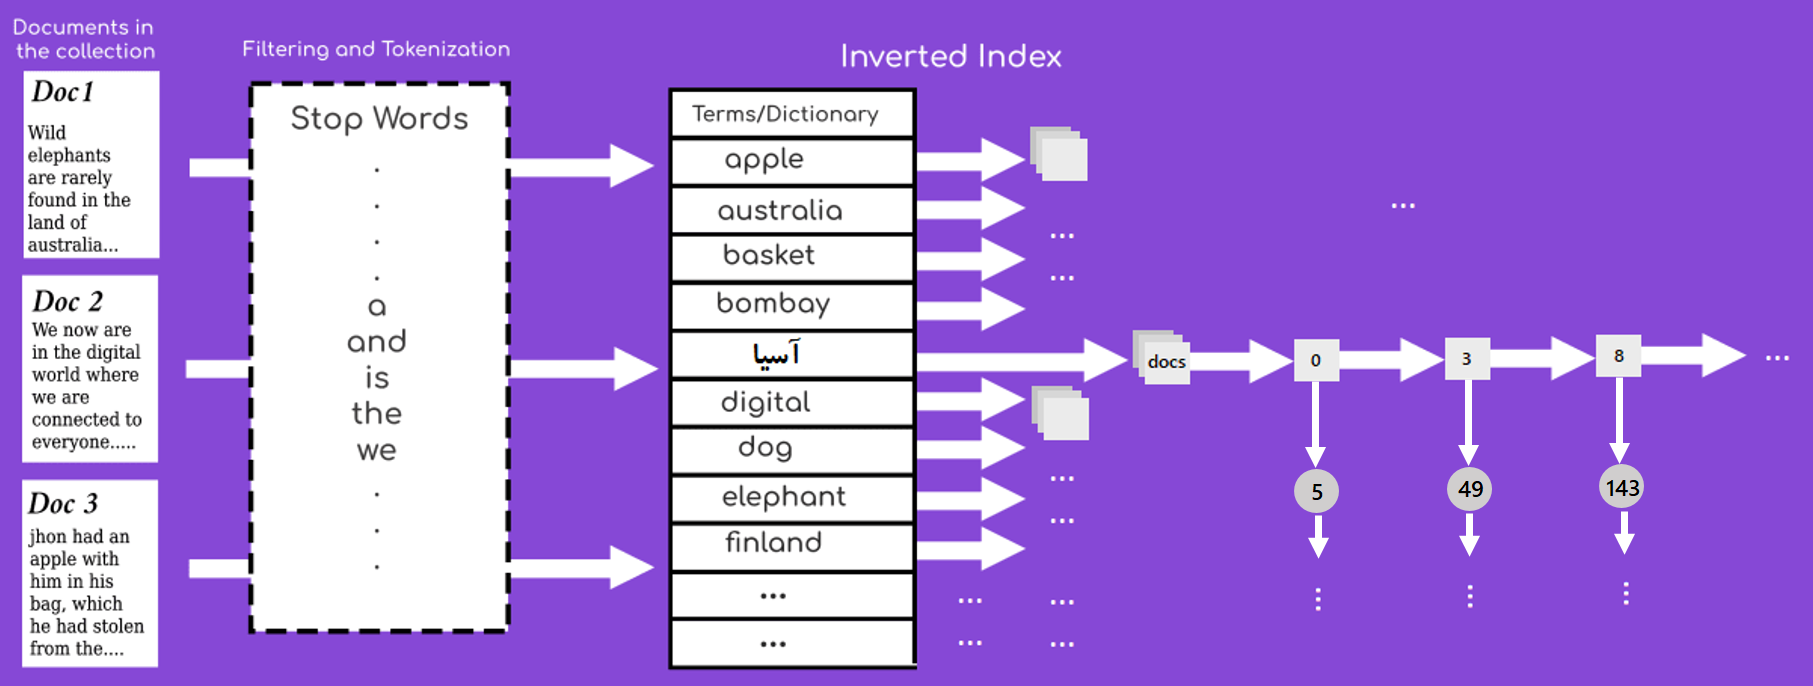

In [ ]:
inverted_index = {}

In [ ]:
for i in range(size):
  tp_doc = 0
  for token in tokens[i]:
      token_postings = inverted_index.get(token, {})
      if len(token_postings) == 0 : 
          token_postings[i] = [tp_doc]
          
      else:
          postings_list = token_postings.get(i, [])
          postings_list.append(tp_doc)
          token_postings[i] = postings_list
      tp_doc += 1
      inverted_index[token] = token_postings

In [ ]:
inverted_index.get('آسیا') #Asia postings list

{0: [5, 22, 36, 58],
 3: [49, 132],
 8: [143, 148, 172, 177, 276, 322],
 13: [151, 235, 247],
 26: [7],
 27: [79],
 29: [523],
 30: [15, 21, 57],
 34: [113, 115],
 36: [21, 65],
 50: [486, 491],
 54: [182, 193],
 55: [308],
 56: [59, 79],
 60: [52],
 65: [19, 58, 174, 212, 233, 298, 353],
 68: [13, 28, 107, 110, 159, 167, 179, 186, 222, 227, 237, 253, 306, 327],
 70: [10, 85],
 71: [133],
 84: [31],
 86: [414],
 91: [18],
 93: [38, 47, 61],
 104: [146],
 106: [226, 273, 354],
 122: [14, 45, 50],
 130: [10, 65],
 140: [202, 208, 265, 272, 283, 648],
 141: [59],
 142: [48, 54, 95, 104, 142, 168, 186, 281],
 143: [16, 80, 91, 104, 148],
 148: [179, 244, 500, 550],
 155: [177],
 163: [2054, 2115, 2130, 2146, 2163],
 164: [59],
 181: [447],
 182: [76],
 184: [101, 121, 130, 131],
 191: [166, 176],
 202: [72, 82],
 210: [12],
 221: [11],
 228: [109],
 229: [129],
 232: [32, 51, 98],
 270: [55],
 281: [96],
 286: [66],
 301: [8, 41, 54],
 304: [318],
 305: [23],
 320: [161],
 322: [17, 223],


##Query
1. getting a query
2. transforming the query into a proper form

In [ ]:
query = input('put your query here... :')
must_query = ''
if(bool(re.match("\"",query))==True):
  must_query = re.findall(r'"([^"]*)"', query)
  must_query = [sub.split() for sub in must_query]
  must_query = [str(que) for que in must_query[0]]
query = normalizer.normalize(query)
for ele in query:  
  if (ele in punc) or ele in seperator:  
    query = query.replace(ele, " ")
query = word_tokenize(query)
query = [term for term in query if not term in stopwords_list]
query


put your query here... :گابن !صهیونیست


['گابن', '!', 'صهیونیست']

**One word Queries are handled here**

returing a list of docs with most number of the query words

In [ ]:
def top_list(query):
  final = []
  if(bool(inverted_index.get(query))):
    keys = [int(key) for key in inverted_index.get(query)]
    values = [list(value) for value in inverted_index.get(query).values()]
    score = []
    for i in range(len(values)):
      score.append(len(values[i]))
    rank = np.argsort(score)
    for i in range(len(rank)):
      final.append(keys[rank[-i-1]])
    return final

Using top_list for one word queries

In [ ]:
def one_word_query(query):
  final = []
  query_size = len(query)
  if query_size==0:
    return "sorry there's no related documents for your query"
  elif query_size==1:
    top_list(query)
  else : return "no related query found"

Printing the results with this def

In [ ]:
def print_one_word(final):
  for i in range(20):
        print("doc number: {} -> title: {} url: {}".format(df.index[final[i]], df.title[final[i]], df.url[final[i]]))

In [ ]:
one_word_query(query)

**Multi word Queries are handled here**

In [ ]:
def multi_word_query(query, must_query):
  final, normal_query, top_docs, not_list = [], [], [], []
  for i in range(len(query)):
    if query[i] == "«" and query[i+len(must_query)+1] == "»":
      for j in range(1, len(must_query)):
        and_list = intersect(must_query)
        final.append(quote_query(and_list, must_query)[:15])
      i+=len(must_query)+1
    elif query[i] == "!" :
      if type(inverted_index.get(query[i+1]))!=type(None):
        key = [int(key) for key in inverted_index.get(query[i+1])]
        not_list = [j for j in df.index if j not in key]
        if(i+2>=len(query)): break
        else: i+=2
    else:
      normal_query.append(top_list(query[i]))
  if len(normal_query)>1: 
    for i in range(1, len(normal_query)):
      top_docs.append(list(set(normal_query[i-1])& set(normal_query[i])))
  else: top_docs.append(normal_query[0])
  if(len(top_docs)==1): final.append(top_docs[0])
  else:
    for i in range(1, len(top_docs)):
      final.append(list(set(top_docs[i-1]) & set(top_docs[i])))
  if(len(not_list) == 0): return print_result(final[0]) 
  elif(len(final)==1): return print_result(final[0])   
  elif(len(final)==0): return 'Unfortunately there is no result for your query'
  else: return print_result(list(set(not_list) & set(final[0])))

Printing the results with this def

In [ ]:
def print_result(final):
  for i in range(15):
    print("doc number: {} -> title: {} url: {}".format(df.index[final[i]], df.title[final[i]], df.url[final[i]]))

**Output for query: {فدراسیون فوتبال ایران} the multi_word_query**

In [ ]:
multi_word_query(query, must_query)

doc number: 5632 -> title: هفته سیزدهم لیگ برتر فوتبال| تداوم شکست ناپذیری استقلال در اراک؟/ نبرد قرمزپوشان تهران و تبریز url: https://www.farsnews.ir/news/14001011000035/هفته-سیزدهم-لیگ-برتر-فوتبال|-تداوم-شکست-ناپذیری-استقلال-در-اراک-نبرد
doc number: 3593 -> title: سکوت فدراسیون فوتبال درباره مربی تیم ملی/دلیل غیبت هاشمیان چیست؟ url: https://www.farsnews.ir/news/14001106000795/سکوت-فدراسیون-فوتبال-درباره-مربی-تیم-ملی-دلیل-غیبت-هاشمیان-چیست
doc number: 1548 -> title: زمان معرفی رسمی میزبان لیگ قهرمانان مشخص شد/خوشحالی سعودی‌ها از ناکامی استقلال برای بازگشت به آسیا url: https://www.farsnews.ir/news/14001204000177/زمان-معرفی-رسمی-میزبان-لیگ-قهرمانان-مشخص-شد-خوشحالی-سعودی‌ها-از-ناکامی
doc number: 6165 -> title: ترابیان: فدراسیون و سازمان لیگ درباره مجوز حرفه‌ای باید خیلی جدی‌تر رفتار می‌کردند url: https://www.farsnews.ir/news/14001004000495/ترابیان-فدراسیون-و-سازمان-لیگ-درباره-مجوز-حرفه‌ای-باید-خیلی-جدی‌تر
doc number: 6170 -> title: فریادشیران: خوبان عالم کمک کند تا آقایان این همه سوتی ند

**Output for query: {تحریم‌های آمریکا!ایران} using the multi_word_query**

In this scenario we must handle the "!" as not for the word after this sign and then aggregate docs

In [ ]:
multi_word_query(query, must_query)

doc number: 9984 -> title: قالیباف در اجلاس«PUIC»: وحدت و انسجام درمانِ دردهایِ امت اسلامی است/ تشکیل دولت فراگیر و مشارکتی شرط ثبات در افغانستان url: https://www.farsnews.ir/news/14000919000403/قالیباف-در-اجلاسPUIC-وحدت-و-انسجام-درمانِ-دردهایِ-امت-اسلامی-است-
doc number: 11393 -> title: زیگزاگ اصلاح‌طلبان مقابل آمریکا/ دیروز مزاحم برجام، امروز طرف اصلی مذاکرات url: https://www.farsnews.ir/news/14000812000209/زیگزاگ-اصلاح‌طلبان-مقابل-آمریکا-دیروز-مزاحم-برجام-امروز-طرف-اصلی
doc number: 11918 -> title: جهاد مسئولان، قوام‌بخش وحدت مردم خواهد بود url: https://www.farsnews.ir/news/14000801000800/جهاد-مسئولان-قوام‌بخش-وحدت-مردم-خواهد-بود
doc number: 9361 -> title: پرونده مربوط به دو تابعیتی بودن روحانی به کجا رسید؟ url: https://www.farsnews.ir/news/14001007000282/پرونده-مربوط-به-دو-تابعیتی-بودن-روحانی-به-کجا-رسید
doc number: 7315 -> title: جامعه اسلامی دانشجویان: غربی‌ها ثابت کرده‌اند تصمیمی برای لغو تحریم‌ها ندارند url: https://www.farsnews.ir/news/14001210000581/جامعه-اسلامی-دانشجویان-غربی

Output for query: {"فدراسیون فوتبال"} using the multi_word_query

We must have the given query within the double quotation in our docs

In [ ]:
multi_word_query(query, must_query)

doc number: 0 -> title: اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا url: https://www.farsnews.ir/news/14001224001005/اعلام-زمان-قرعه-کشی-جام-باشگاه-های-فوتسال-آسیا
doc number: 3 -> title: ماجدی در نشست با صالحی امیری: امیدوارم در این دوره تیم  المپیک موفق شود url: https://www.farsnews.ir/news/14001224000964/ماجدی-در-نشست-با-صالحی-امیری-امیدوارم-در-این-دوره-تیم-المپیک-موفق
doc number: 7 -> title: احضار مدیران پرسپولیس به کمیته انضباطی  پیش از دربی url: https://www.farsnews.ir/news/14001224000842/احضار-مدیران-پرسپولیس-به-کمیته-انضباطی-پیش-از-دربی
doc number: 16 -> title: اعلام اسامی داوران هفته بیست و دوم لیگ دسته اول url: https://www.farsnews.ir/news/14001224000524/اعلام-اسامی-داوران-هفته-بیست-و-دوم-لیگ-دسته-اول
doc number: 33 -> title: درخواست مدیر فوتبال کره جنوبی از مردم ؛ بیایید با هم ایران را شکست دهیم url: https://www.farsnews.ir/news/14001224000208/درخواست-مدیر-فوتبال-کره-جنوبی-از-مردم-بیایید-با-هم-ایران-را-شکست-دهیم
doc number: 35 -> title: ورزشگاه سئول پر از تماشاگر/ دیدار ا

Output for query: {"تحریم هسته ای"آمریکا!ایران} using the multi_word_query

In [ ]:
multi_word_query(query, must_query)

doc number: 11393 -> title: زیگزاگ اصلاح‌طلبان مقابل آمریکا/ دیروز مزاحم برجام، امروز طرف اصلی مذاکرات url: https://www.farsnews.ir/news/14000812000209/زیگزاگ-اصلاح‌طلبان-مقابل-آمریکا-دیروز-مزاحم-برجام-امروز-طرف-اصلی
doc number: 7395 -> title: دفاتر بسیج دانشجویی 8 دانشگاه تهران: رویکرد «سازش» تجربهٔ تلخ برجام را نصیب تاریخ پرافتخار انقلاب کرد url: https://www.farsnews.ir/news/14001207001213/دفاتر-بسیج-دانشجویی-دانشگاه-تهران-رویکرد-سازش-تجربهٔ-تلخ-برجام-را
doc number: 10862 -> title: دادگاهی به بهانه آبان،‌ برای پرونده‌سازی حقوق بشری/دادگاه‌هایی که هیچ‌گاه تشکیل نمی‌شود url: https://www.farsnews.ir/news/14000826000161/دادگاهی-به-بهانه-آبان‌-برای-پرونده‌سازی-حقوق-بشری-دادگاه‌هایی-که
doc number: 7346 -> title: تجمع دانشجویان در فرودگاه امام| تاکید بر رعایت شروط رهبر انقلاب در مذاکرات url: https://www.farsnews.ir/news/14001209000476/تجمع-دانشجویان-در-فرودگاه-امام|-تاکید-بر-رعایت-شروط-رهبر-انقلاب-در
doc number: 7315 -> title: جامعه اسلامی دانشجویان: غربی‌ها ثابت کرده‌اند تصمیمی برای لغو تح

Output for a rare word query: {گابن !صهیونیست}

In [ ]:
multi_word_query(query, must_query)

doc number: 6764 -> title: اعلام رای کمیته انضباطی در خصوص بازیکن گابنی/ گل گهر در بازی با پیکان، استقلال و سپاهان بازنده شد url: https://www.farsnews.ir/news/14000925000613/اعلام-رای-کمیته-انضباطی-در-خصوص-بازیکن-گابنی-گل-گهر-در-بازی-با-پیکان
doc number: 4419 -> title: شوک بزرگ به ستاره اخراجی آرسنال / اوبامیانگ جام ملت ها را از دست داد؟ url: https://www.farsnews.ir/news/14001027000456/شوک-بزرگ-به-ستاره-اخراجی-آرسنال--اوبامیانگ-جام-ملت-ها-را-از-دست-داد
doc number: 3141 -> title: کمیته استیناف رأی بازیکن گابنی گل گهر را تأیید کرد/ امتیازها به تیم سیرجانی برگردانده نمی‌شود url: https://www.farsnews.ir/news/14001112000715/کمیته-استیناف-رأی-بازیکن-گابنی-گل-گهر-را-تأیید-کرد-امتیازها-به-تیم
doc number: 3079 -> title: پیام زیبای خداحافظی اوبامیانگ از آرسنال +عکس url: https://www.farsnews.ir/news/14001113000180/پیام-زیبای-خداحافظی-اوبامیانگ-از-آرسنال-عکس
doc number: 6662 -> title: باشگاه گل‌گهر: به وجود عدالت در فدراسیون امیدواریم/اطلاعات غلط کارگزار خارجی یا فدراسیون گابن، مورد تایید ما نیست 

**Intersection of Documents of 2 words**

In [ ]:
def intersect(must_query):
  keys, values = [], []
  for j in range(2):
    keys.append([int(key) for key in inverted_index.get(must_query[j])])
  joint = [x for x in keys[0] if x in keys[1]]
  return joint

In [ ]:
intersect(must_query)

[0,
 1,
 3,
 7,
 16,
 33,
 35,
 36,
 37,
 45,
 53,
 79,
 80,
 81,
 84,
 86,
 87,
 89,
 127,
 128,
 134,
 137,
 138,
 139,
 165,
 171,
 179,
 182,
 184,
 191,
 202,
 204,
 229,
 259,
 293,
 302,
 304,
 311,
 319,
 324,
 327,
 338,
 349,
 352,
 354,
 375,
 378,
 385,
 387,
 401,
 402,
 404,
 409,
 417,
 446,
 458,
 464,
 472,
 478,
 483,
 493,
 499,
 502,
 505,
 509,
 510,
 511,
 513,
 534,
 555,
 560,
 577,
 578,
 582,
 592,
 629,
 687,
 699,
 716,
 719,
 775,
 789,
 790,
 797,
 798,
 805,
 841,
 847,
 848,
 856,
 857,
 860,
 868,
 870,
 885,
 894,
 895,
 912,
 913,
 923,
 937,
 940,
 953,
 964,
 982,
 987,
 1004,
 1010,
 1011,
 1020,
 1030,
 1053,
 1054,
 1074,
 1089,
 1094,
 1111,
 1122,
 1128,
 1131,
 1139,
 1140,
 1193,
 1196,
 1198,
 1201,
 1203,
 1204,
 1214,
 1230,
 1252,
 1262,
 1267,
 1272,
 1276,
 1295,
 1304,
 1305,
 1306,
 1308,
 1315,
 1329,
 1342,
 1351,
 1355,
 1392,
 1410,
 1419,
 1437,
 1447,
 1463,
 1466,
 1522,
 1525,
 1535,
 1543,
 1548,
 1553,
 1572,
 1580,
 1583,
 

**Making A new Postings List of documents that contain both words for each word from**

In [ ]:
def make_intersected_dict(and_list, must_query):
  nli1 = {}
  for k in and_list:
      if k in must_query:
        nli1.update( {k : must_query[k]} )
  return nli1

**Finding the documents that contain 2 words sequentially**

E.g. 
If the query is "فدراسیون فوتبال", the results will show the docs that containt football right after the word federation.

In [ ]:
def quote_query(and_list, must_query):
  dict1 = make_intersected_dict(and_list, inverted_index.get(must_query[0]))
  dict2 = make_intersected_dict(and_list, inverted_index.get(must_query[1]))
  li1 = list(dict1.keys())
  po1 = list(dict1.values())
  po2 = list(dict2.values())
  final = []
  for i in range(len(and_list)):
    po2[i] = [x - 1 for x in po2[i]]
    joint_num = [y for y in po2[i] if y in po1[i]]
    if len(joint_num) > 0:
      final.append(li1[i])
  return final

In [ ]:
quote_query(intersect(must_query), must_query)

[0,
 3,
 7,
 16,
 33,
 35,
 36,
 37,
 45,
 53,
 79,
 80,
 81,
 84,
 87,
 89,
 127,
 134,
 137,
 138,
 139,
 165,
 179,
 182,
 202,
 204,
 259,
 293,
 311,
 324,
 338,
 349,
 352,
 375,
 385,
 387,
 401,
 402,
 404,
 409,
 417,
 446,
 464,
 472,
 478,
 493,
 499,
 502,
 509,
 510,
 534,
 555,
 560,
 577,
 582,
 592,
 699,
 716,
 719,
 775,
 789,
 790,
 798,
 805,
 841,
 847,
 848,
 856,
 857,
 860,
 868,
 870,
 885,
 894,
 895,
 913,
 923,
 937,
 940,
 953,
 987,
 1004,
 1011,
 1053,
 1054,
 1074,
 1094,
 1111,
 1122,
 1131,
 1140,
 1196,
 1198,
 1201,
 1203,
 1204,
 1214,
 1230,
 1252,
 1267,
 1295,
 1304,
 1305,
 1306,
 1308,
 1315,
 1329,
 1342,
 1351,
 1355,
 1392,
 1410,
 1419,
 1437,
 1447,
 1463,
 1466,
 1522,
 1525,
 1535,
 1543,
 1548,
 1553,
 1572,
 1580,
 1583,
 1585,
 1595,
 1600,
 1607,
 1614,
 1619,
 1622,
 1640,
 1648,
 1649,
 1662,
 1672,
 1675,
 1679,
 1687,
 1703,
 1727,
 1730,
 1742,
 1743,
 1753,
 1754,
 1758,
 1764,
 1797,
 1805,
 1809,
 1824,
 1825,
 1858,
 1865,
 

# phase 2

In [ ]:
words = list(inverted_index) #code for testing something
words[0]
inverted_index.get(words[0])

{0: [0],
 1: [0],
 2: [0],
 3: [0],
 4: [0],
 5: [0],
 6: [0, 56],
 7: [0],
 8: [0],
 9: [0],
 10: [0],
 11: [0],
 12: [0],
 13: [0],
 14: [0],
 15: [0],
 16: [0],
 17: [0],
 18: [0],
 19: [0, 61, 85],
 20: [0],
 21: [0],
 22: [0],
 23: [0],
 24: [0],
 25: [0, 35, 45],
 26: [0],
 28: [0, 138],
 30: [0],
 32: [0],
 33: [0],
 34: [0],
 35: [0],
 36: [0],
 37: [0],
 38: [0],
 39: [0],
 40: [0],
 41: [0],
 42: [0],
 43: [0],
 45: [0],
 46: [0],
 47: [0],
 48: [0],
 49: [0],
 51: [0],
 52: [0],
 53: [0],
 54: [0],
 55: [0],
 56: [0],
 57: [0],
 58: [0],
 59: [0],
 60: [0],
 61: [0],
 62: [0],
 63: [0],
 65: [0],
 66: [0],
 67: [0],
 68: [0, 241],
 69: [0],
 70: [0],
 72: [0],
 73: [0],
 74: [0],
 75: [0],
 76: [0, 106],
 77: [0, 24],
 78: [0],
 79: [0],
 80: [0],
 81: [0],
 82: [0],
 83: [0],
 84: [0],
 85: [0],
 86: [0],
 87: [0],
 88: [0],
 89: [0],
 90: [0],
 92: [0],
 93: [0],
 94: [0],
 95: [0],
 96: [0],
 97: [0],
 98: [0],
 99: [0],
 100: [0],
 101: [0],
 102: [0],
 103: [0],
 105: [

##TF

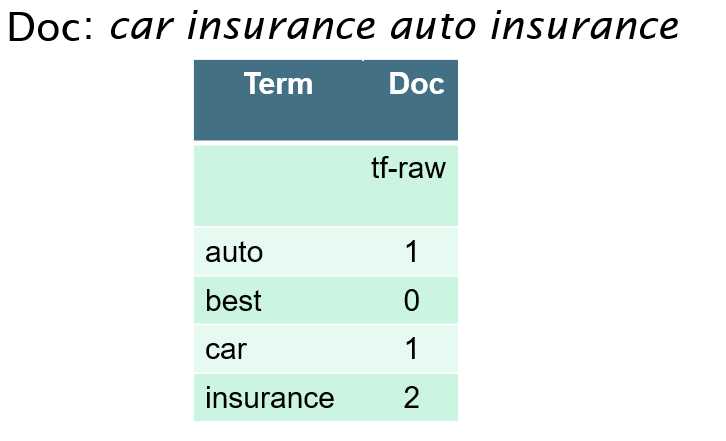

In [ ]:
tf = {}
for i in range(size):
  tp_doc = 0
  for token in tokens[i]:
      token_postings = tf.get(token, {})
      if len(token_postings) == 0 : 
          token_postings[i] = [tp_doc]
          
      else:
          postings_list = token_postings.get(i, [])
          postings_list.append(tp_doc)
          token_postings[i] = postings_list
      tp_doc += 1
      tf[token] = token_postings

In [ ]:
for item in tf.values():
  for index in item.keys():
    item[index] = len(item[index])

In [ ]:
tf.get('گزار') #you can see the number of occurences of gozar in each doc. (only the docs that havethe word gozar more than 1)

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 2,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 3,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 3,
 26: 1,
 28: 2,
 30: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 2,
 69: 1,
 70: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 2,
 77: 2,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 2,
 110: 1,
 111: 1,
 112: 2,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 124: 2,
 125: 1,
 126: 2,
 127: 1,
 129: 1,
 130: 1,
 131: 1,
 132

**Second step of calculatinf TF**

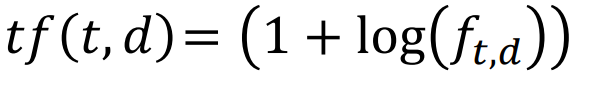

In [ ]:
for item in tf.values():
  for index in item.keys():
    item[index] = 1+np.log(item[index])

In [ ]:
tf.get('گزار')

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.6931471805599454,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 2.09861228866811,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 2.09861228866811,
 26: 1.0,
 28: 1.6931471805599454,
 30: 1.0,
 32: 1.0,
 33: 1.0,
 34: 1.0,
 35: 1.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 1.0,
 40: 1.0,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 45: 1.0,
 46: 1.0,
 47: 1.0,
 48: 1.0,
 49: 1.0,
 51: 1.0,
 52: 1.0,
 53: 1.0,
 54: 1.0,
 55: 1.0,
 56: 1.0,
 57: 1.0,
 58: 1.0,
 59: 1.0,
 60: 1.0,
 61: 1.0,
 62: 1.0,
 63: 1.0,
 65: 1.0,
 66: 1.0,
 67: 1.0,
 68: 1.6931471805599454,
 69: 1.0,
 70: 1.0,
 72: 1.0,
 73: 1.0,
 74: 1.0,
 75: 1.0,
 76: 1.6931471805599454,
 77: 1.6931471805599454,
 78: 1.0,
 79: 1.0,
 80: 1.0,
 81: 1.0,
 82: 1.0,
 83: 1.0,
 84: 1.0,
 85: 1.0,
 86: 1.0,
 87: 1.0,
 88: 1.0,
 89: 1.0,
 90: 1.0,
 92: 1.0,
 93: 1.0,
 94: 1.0,
 95: 1.0,
 96: 1.0,
 97: 1.0,
 98: 1.0,

#IDF

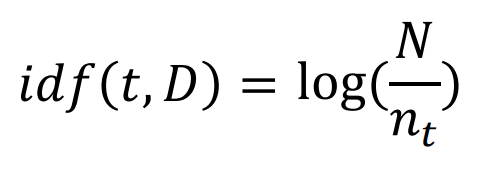

In [ ]:
idf = {}
for item in tf.keys():
  idf.update({item: np.log(size/len(tf.get(item).keys()))})

In [ ]:
idf.get('گزار')

0.15346796477964458

# TF*IDF

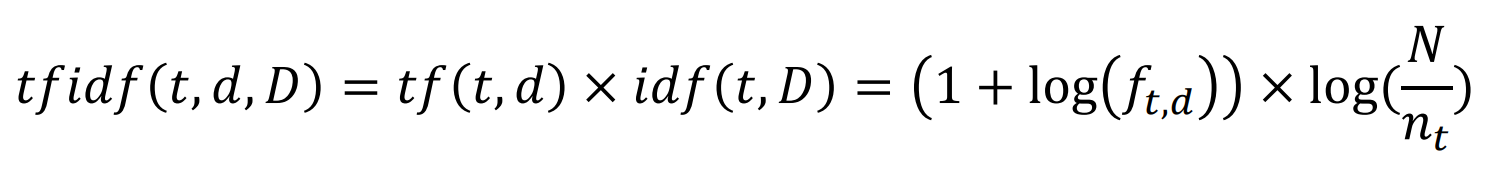

In [ ]:
i=0
for item in tf.values():
  word = list(tf.keys())[i]
  for index in item.keys():
    item[index] = item[index]*idf.get(word)
  i+=1

In [ ]:
tf.get('آسیا')

{0: 5.47167992274741,
 3: 3.8823204651828713,
 8: 6.401395605589182,
 13: 4.812036148024645,
 26: 2.2929610076183327,
 27: 2.2929610076183327,
 29: 2.2929610076183327,
 30: 4.812036148024645,
 34: 3.8823204651828713,
 36: 3.8823204651828713,
 50: 3.8823204651828713,
 54: 3.8823204651828713,
 55: 2.2929610076183327,
 56: 3.8823204651828713,
 60: 2.2929610076183327,
 65: 6.754857103730944,
 68: 8.344216561295482,
 70: 3.8823204651828713,
 71: 2.2929610076183327,
 84: 2.2929610076183327,
 86: 2.2929610076183327,
 91: 2.2929610076183327,
 93: 4.812036148024645,
 104: 2.2929610076183327,
 106: 4.812036148024645,
 122: 4.812036148024645,
 130: 3.8823204651828713,
 140: 6.401395605589182,
 141: 2.2929610076183327,
 142: 7.061039380311948,
 143: 5.983339385012374,
 148: 5.47167992274741,
 155: 2.2929610076183327,
 163: 5.983339385012374,
 164: 2.2929610076183327,
 181: 2.2929610076183327,
 182: 2.2929610076183327,
 184: 5.47167992274741,
 191: 3.8823204651828713,
 202: 3.8823204651828713,
 210

**Getting query**

In [ ]:
query = input('put your query here... :')
query = normalizer.normalize(query)
for ele in query:  
  if (ele in punc) or ele in seperator:  
    query = query.replace(ele, " ")
query = word_tokenize(query)
query = [term for term in query if not term in stopwords_list]
query

put your query here... :فدراسیون


['فدراسیون']

**Calculating query's Tf**

Note. We do not need to use idf here, because it is used in our documents.

In [ ]:
def query_tf(query):
  tf = {}
  for term in np.unique(query):
    tf.update({term:(1+np.log(query.count(term)))})
  return tf

In [ ]:
query_tf(query)

{'فدراسیون': 1.0, 'فوتبال': 1.0}

## Vector of documents with tf-idf values

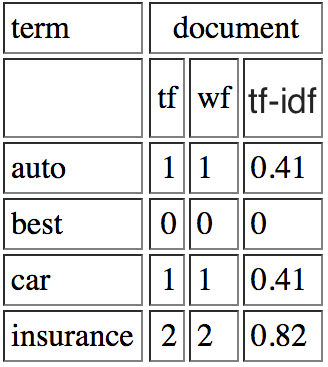

In [ ]:
tf_idf = []*size
# i=0
# iterating key value pair
for i in range(size):
	temp = {}
	for key ,value in tf.items():
		if value and i in value.keys():
			temp.update({key:value[i]})
	tf_idf.append(temp)

In [ ]:
tf_idf[0]

{'گزار': 0.15346796477964458,
 'خبرگزار': 0.01586023663776855,
 'فارس': 0.004764652076386581,
 'کنفدراسیون': 4.07181707201048,
 'فوتبال': 2.2028401213298467,
 'آسیا': 5.47167992274741,
 'AFC': 4.126151422973809,
 'نامه': 2.181692652983143,
 'ا': 0.8477623729988759,
 'رسم': 2.6723881937099425,
 'فدراسیون': 2.0881665949723196,
 'ایر': 2.0203767465766,
 'باشگاه': 4.1305106272653465,
 'گیت': 11.622438336429257,
 'پسند': 10.326680904942485,
 'ز': 1.7673107488385402,
 'قرعه': 7.742886070860056,
 'کش': 6.861934197621008,
 'جا': 3.996624699346499,
 'فوتسال': 9.846211873769214,
 'رسما': 4.412142877947683,
 'اعلا': 1.4940069824487194,
 'اساس': 1.7291795112752075,
 '۲۵': 3.0275391343056994,
 'فروردین': 4.131240492481281,
 'ماه': 1.6391319475530122,
 '۱۴۰۱': 2.7839627837038416,
 'مراس': 2.9796356736726604,
 'مالز': 5.625165517793537,
 'برگزار': 1.281655298894026,
 'بعنو': 4.489374225883672,
 'قهر': 2.8843254938683356,
 'سال': 1.0095950571876557,
 '۱۴۰۰': 2.6466256447799186,
 'مسابق': 3.44190920954

## Cosine Similarity

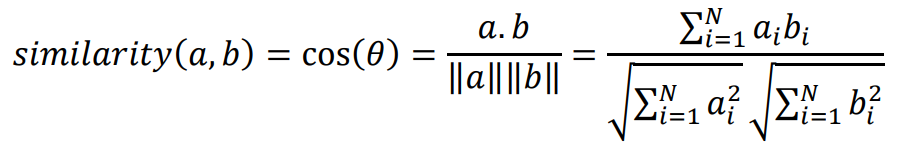

Calculating Cosine Similarity of our query with our documents and showing the results.

**Normalizing documents vector**


In [ ]:
def norm2_doc(query, doc):
  norm2 = []
  for item in np.unique(query):
      if item in tf_idf[doc].keys():
        norm2.append(tf_idf[doc].get(item))
      else: norm2.append(0)
  return np.linalg.norm(norm2)

In [ ]:
norm2_doc(query, 500)

2.2028401213298467

In [ ]:
def cosine_similarity(query):
  sum = {}
  score = 0
  query_t = query_tf(query)
  for i in range(size):
    temp = 0
    for item in np.unique(query):
      if item in tf_idf[i].keys():
        temp+=(query_t.get(item)*tf_idf[i].get(item))
    score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))   
    if(not np.isnan(score)):
      sum.update({i:score})
  keys_sum = list(sum.keys())
  values_sum = list(sum.values())
  final_score = {keys_sum[i]:values_sum[i] for i in np.argsort(values_sum)[::-1]}
  return print_result(list(final_score)[:20])

One word common query ---> "فدراسیون"

In [ ]:
cosine_similarity(query)

<ipython-input-49-3fcf7064d513>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 12118 -> title: تاکید قالیباف بر تشکیل کمیسیون‌های مشترک عالی پارلمانی و اقتصادی ایران و روسیه url: https://www.farsnews.ir/news/14000726000582/تاکید-قالیباف-بر-تشکیل-کمیسیون‌های-مشترک-عالی-پارلمانی-و-اقتصادی-ایران
doc number: 2482 -> title: برکناری و عزل عزیزی خادم رسمی شد/ ثبت درخواست توسط هیات رئیسه url: https://www.farsnews.ir/news/14001120000902/برکناری-و-عزل-عزیزی-خادم-رسمی-شد-ثبت-درخواست-توسط-هیات-رئیسه
doc number: 2437 -> title: معرفی نفرات برتر مرحله پنجم مسابقات آزاد تیراندازی url: https://www.farsnews.ir/news/14001121000653/معرفی-نفرات-برتر-مرحله-پنجم-مسابقات-آزاد-تیراندازی
doc number: 2449 -> title: اسامی بازیکنان دعوت شده به اردوی تیم ملی بسکتبال اعلام شد url: https://www.farsnews.ir/news/14001121000484/اسامی-بازیکنان-دعوت-شده-به-اردوی-تیم-ملی-بسکتبال-اعلام-شد
doc number: 2453 -> title: تصمیمات سازمان لیگ فوتسال راهگشا یا بلای جان؟ url: https://www.farsnews.ir/news/14001119001101/تصمیمات-سازمان-لیگ-فوتسال-راهگشا-یا-بلای-جان
doc number: 2458 -> title: سراجی: درخ

In [ ]:
champion_similarity(query)

<ipython-input-55-97d8424d142a>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6128 -> title: داداش زاده:کسانی که در راس سرخابی ها بودند حالا برای دو باشگاه تصمیم گیر شده اند/آنها با احساسات مردم بازی می کنند url: https://www.farsnews.ir/news/14001004000357/داداش-زاده-کسانی-که-در-راس-سرخابی-ها-بودند-حالا-برای-دو-باشگاه-تصمیم
doc number: 4918 -> title: عزیزی خادم: فوتبال ایران از وضعیت اسفبار گذشته عبور کرد url: https://www.farsnews.ir/news/14001021000577/عزیزی-خادم-فوتبال-ایران-از-وضعیت-اسفبار-گذشته-عبور-کرد
doc number: 3057 -> title: باشگاه گل‌گهر:با افتضاح کمیته بین‌الملل تاریخی‌ترین اشتباه رقم خورد/ماجرای پاتوسی را فراموش کردید؟ url: https://www.farsnews.ir/news/14001113000436/باشگاه-گل‌گهر-با-افتضاح-کمیته-بین‌الملل-تاریخی‌ترین-اشتباه-رقم-خورد
doc number: 562 -> title: داورزنی: از وزارت ورزش پول نمی‌خواهیم/ حضور در جمع برترین‌ها زمان‌بر است url: https://www.farsnews.ir/news/14001216000699/داورزنی-از-وزارت-ورزش-پول-نمی‌خواهیم-حضور-در-جمع-برترین‌ها-زمان‌بر
doc number: 2336 -> title: رونمایی از اسناد فعالیت غیرقانونی حامیان عزیزی خادم/ بهاروند و مهرعل

Multiple word common query ---> "فدراسیون فوتبال"

In [ ]:
cosine_similarity(query)

<ipython-input-49-3fcf7064d513>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6327 -> title: گل محمدی: فوتبال ایران شبیه دورهمی است/ استقلال و پرسپولیس به آسیا اعتبار می دهند url: https://www.farsnews.ir/news/14001002000210/گل-محمدی-فوتبال-ایران-شبیه-دورهمی-است-استقلال-و-پرسپولیس-به-آسیا
doc number: 1463 -> title: استیلی: هیچ بازی تیم ملی تشریفاتی نیست/ در دو بازی باقیمانده با تمام قوا ظاهر می شویم url: https://www.farsnews.ir/news/14001204001205/استیلی-هیچ-بازی-تیم-ملی-تشریفاتی-نیست-در-دو-بازی-باقیمانده-با-تمام
doc number: 5285 -> title: منافی: عزیزی خادم و کمیته های بدوی و استیناف باید پاسخگو باشند/حتما شیطنتی شده است url: https://www.farsnews.ir/news/14001017000075/منافی-عزیزی-خادم-و-کمیته-های-بدوی-و-استیناف-باید-پاسخگو-باشند-حتما
doc number: 555 -> title: مدیر تیم پیکان: چقدر از داوری ضربه بخوریم و بگوییم عیب ندارد؟/ برادران حیدری حق‌ ما را نمی‌دهند url: https://www.farsnews.ir/news/14001216000770/مدیر-تیم-پیکان-چقدر-از-داوری-ضربه-بخوریم-و-بگوییم-عیب-ندارد-برادران
doc number: 5972 -> title: حضور مشاور رئیس جمهوری در تمرین فوتبال/ غیبت وزیر و رئیس

In [ ]:
champion_similarity(query)

<ipython-input-55-97d8424d142a>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6128 -> title: داداش زاده:کسانی که در راس سرخابی ها بودند حالا برای دو باشگاه تصمیم گیر شده اند/آنها با احساسات مردم بازی می کنند url: https://www.farsnews.ir/news/14001004000357/داداش-زاده-کسانی-که-در-راس-سرخابی-ها-بودند-حالا-برای-دو-باشگاه-تصمیم
doc number: 4918 -> title: عزیزی خادم: فوتبال ایران از وضعیت اسفبار گذشته عبور کرد url: https://www.farsnews.ir/news/14001021000577/عزیزی-خادم-فوتبال-ایران-از-وضعیت-اسفبار-گذشته-عبور-کرد
doc number: 1950 -> title: فریادشیران:رئیس هزار شبهه با خردجمعی برکنار شد/تا خدا هست،پیوندهای شیطانی پودر می‌شوند url: https://www.farsnews.ir/news/14001128000554/فریادشیران-رئیس-هزار-شبهه-با-خردجمعی-برکنار-شد-تا-خدا-هستپیوندهای
doc number: 2268 -> title: عربشاهی: تصمیم هیات رئیسه برای برکناری عزیزی خادم جهادی بود/ فعالیت  کمیته اخلاق غیرقانونی است url: https://www.farsnews.ir/news/14001123000947/عربشاهی-تصمیم-هیات-رئیسه-برای-برکناری-عزیزی-خادم-جهادی-بود-فعالیت-
doc number: 6323 -> title: عزیزی خادم:وقتی به فدراسیون آمدم یک چای خشک هم در آن نبود/ب

One rare word ---> "گابن"

In [ ]:
cosine_similarity(query)

<ipython-input-49-3fcf7064d513>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6799 -> title: 8 نکته از هفته دهم لیگ برتر| اعتراف سرمربی استقلال،بازی پرکنایه پرسپولیس و سوپرگل لیست مازاد یحیی/تکرار حرکت مجیدی توسط قلعه نویی url: https://www.farsnews.ir/news/14000925000019/-نکته-از-هفته-دهم-لیگ-برتر|-اعتراف-سرمربی-استقلالبازی-پرکنایه-پرسپولیس
doc number: 3717 -> title: 8 نکته از هفته شانزدهم لیگ برتر| از مشکلات شاعرانه تا کنایه ستاره میلیاردی پرسپولیس/ در انتظار شوک محرم، کمیته مسابقات مردود شد url: https://www.farsnews.ir/news/14001105000055/-نکته-از-هفته-شانزدهم-لیگ-برتر|-از-مشکلات-شاعرانه-تا-کنایه-ستاره
doc number: 3224 -> title: زمان صدور رای پرونده بازیکن گابنی گل‌گهر مشخص شد url: https://www.farsnews.ir/news/14001111000661/زمان-صدور-رای-پرونده-بازیکن-گابنی-گل‌گهر-مشخص-شد
doc number: 3232 -> title: خرید جدید ژاوی به شهر بارسلونا رسید +عکس url: https://www.farsnews.ir/news/14001111000603/خرید-جدید-ژاوی-به-شهر-بارسلونا-رسید-عکس
doc number: 3236 -> title: بارسلونا در تقلای فروش دمبله / ستاره فرانسوی ماندنی شد؟ url: https://www.farsnews.ir/news/140011

In [ ]:
champion_similarity(query)

<ipython-input-55-97d8424d142a>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6799 -> title: 8 نکته از هفته دهم لیگ برتر| اعتراف سرمربی استقلال،بازی پرکنایه پرسپولیس و سوپرگل لیست مازاد یحیی/تکرار حرکت مجیدی توسط قلعه نویی url: https://www.farsnews.ir/news/14000925000019/-نکته-از-هفته-دهم-لیگ-برتر|-اعتراف-سرمربی-استقلالبازی-پرکنایه-پرسپولیس
doc number: 3717 -> title: 8 نکته از هفته شانزدهم لیگ برتر| از مشکلات شاعرانه تا کنایه ستاره میلیاردی پرسپولیس/ در انتظار شوک محرم، کمیته مسابقات مردود شد url: https://www.farsnews.ir/news/14001105000055/-نکته-از-هفته-شانزدهم-لیگ-برتر|-از-مشکلات-شاعرانه-تا-کنایه-ستاره
doc number: 3224 -> title: زمان صدور رای پرونده بازیکن گابنی گل‌گهر مشخص شد url: https://www.farsnews.ir/news/14001111000661/زمان-صدور-رای-پرونده-بازیکن-گابنی-گل‌گهر-مشخص-شد
doc number: 3232 -> title: خرید جدید ژاوی به شهر بارسلونا رسید +عکس url: https://www.farsnews.ir/news/14001111000603/خرید-جدید-ژاوی-به-شهر-بارسلونا-رسید-عکس
doc number: 3236 -> title: بارسلونا در تقلای فروش دمبله / ستاره فرانسوی ماندنی شد؟ url: https://www.farsnews.ir/news/140011

Multiple rare words ---> "فدراسیون فوتبال گابن"

In [ ]:
cosine_similarity(query)

<ipython-input-49-3fcf7064d513>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6327 -> title: گل محمدی: فوتبال ایران شبیه دورهمی است/ استقلال و پرسپولیس به آسیا اعتبار می دهند url: https://www.farsnews.ir/news/14001002000210/گل-محمدی-فوتبال-ایران-شبیه-دورهمی-است-استقلال-و-پرسپولیس-به-آسیا
doc number: 1797 -> title: قلعه نویی: رکن قضایی بعد از اعتراض اول به بازیکن گابنی باید دستور موقت می‌داد/واکنش جالب امیر به اضافه وزنش url: https://www.farsnews.ir/news/14001130001086/قلعه-نویی-رکن-قضایی-بعد-از-اعتراض-اول-به-بازیکن-گابنی-باید-دستور-موقت
doc number: 3048 -> title: عضو کمیته انضباطی فدراسیون فوتبال:به بیانیه‌های اخیر باشگاه‌ها ورود می‌کنیم url: https://www.farsnews.ir/news/14001113000511/عضو-کمیته-انضباطی-فدراسیون-فوتبال-به-بیانیه‌های-اخیر-باشگاه‌ها-ورود
doc number: 3057 -> title: باشگاه گل‌گهر:با افتضاح کمیته بین‌الملل تاریخی‌ترین اشتباه رقم خورد/ماجرای پاتوسی را فراموش کردید؟ url: https://www.farsnews.ir/news/14001113000436/باشگاه-گل‌گهر-با-افتضاح-کمیته-بین‌الملل-تاریخی‌ترین-اشتباه-رقم-خورد
doc number: 4661 -> title: ساکت: وزارت ورزش به سرخابی ها تنف

In [ ]:
champion_similarity(query)

<ipython-input-55-97d8424d142a>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 3057 -> title: باشگاه گل‌گهر:با افتضاح کمیته بین‌الملل تاریخی‌ترین اشتباه رقم خورد/ماجرای پاتوسی را فراموش کردید؟ url: https://www.farsnews.ir/news/14001113000436/باشگاه-گل‌گهر-با-افتضاح-کمیته-بین‌الملل-تاریخی‌ترین-اشتباه-رقم-خورد
doc number: 3457 -> title: عزیزی‌خادم:‌ ما را به جادوگری متهم کردند ولی جادوگری شرک است/هنوز برای کی‌‌روش مالیات می‌دهیم/مگر اسکوچیچ رفته است؟ url: https://www.farsnews.ir/news/14001108000181/عزیزی‌خادم-‌-ما-را-به-جادوگری-متهم-کردند-ولی-جادوگری-شرک-است-هنوز-برای
doc number: 3141 -> title: کمیته استیناف رأی بازیکن گابنی گل گهر را تأیید کرد/ امتیازها به تیم سیرجانی برگردانده نمی‌شود url: https://www.farsnews.ir/news/14001112000715/کمیته-استیناف-رأی-بازیکن-گابنی-گل-گهر-را-تأیید-کرد-امتیازها-به-تیم
doc number: 6764 -> title: اعلام رای کمیته انضباطی در خصوص بازیکن گابنی/ گل گهر در بازی با پیکان، استقلال و سپاهان بازنده شد url: https://www.farsnews.ir/news/14000925000613/اعلام-رای-کمیته-انضباطی-در-خصوص-بازیکن-گابنی-گل-گهر-در-بازی-با-پیکان
doc number: 61

##Champion List

**Making a new tf-idf dictionary but with a twist.**
1. First, we sort the scores of each word in the documents of the word.
2. calculating tf-idf with our champion list so we can make new document vectors.


In [ ]:
champion_list = {}
for item in tf.keys():
  ch = {}
  keys = [list(tf.get(item).keys())[key] for key in np.argsort(list(tf.get(item).values()))[-100:][::-1]]
  values = [float(value) for value in np.sort(list(tf.get(item).values()))[-100:][::-1]]
  for i in range(len(keys)):
    ch.update({keys[i] : values[i]})
  champion_list.update({item: ch})

In [ ]:
champion_tfidf = []*size
for i in range(size):
	temp = {}
	for key ,value in champion_list.items():
		if value and i in value.keys():
			temp.update({key:value[i]})
	champion_tfidf.append(temp)

In [ ]:
champion_list.get('آسیا')

{5054: 9.16205830014145,
 2641: 8.78940873180318,
 1308: 8.78940873180318,
 3457: 8.502414525418684,
 5905: 8.502414525418684,
 68: 8.344216561295482,
 2098: 8.344216561295482,
 1318: 8.344216561295482,
 8568: 8.174289870793332,
 4639: 8.174289870793332,
 2803: 8.174289870793332,
 1361: 8.174289870793332,
 3012: 8.174289870793332,
 2110: 7.990755063153721,
 1633: 7.990755063153721,
 6178: 7.791241368497321,
 5276: 7.791241368497321,
 2376: 7.791241368497321,
 2870: 7.791241368497321,
 1381: 7.791241368497321,
 562: 7.572698842576912,
 10533: 7.572698842576912,
 5899: 7.572698842576912,
 3369: 7.572698842576912,
 3906: 7.572698842576912,
 1105: 7.572698842576912,
 5218: 7.572698842576912,
 1199: 7.572698842576912,
 3724: 7.572698842576912,
 4887: 7.572698842576912,
 1781: 7.572698842576912,
 4618: 7.572698842576912,
 4441: 7.3311112884309555,
 2000: 7.3311112884309555,
 4429: 7.3311112884309555,
 5975: 7.3311112884309555,
 6134: 7.3311112884309555,
 2644: 7.3311112884309555,
 8465: 7.33

## Champion list Cosine Similarity

Calculating Cosine Similarity of our query with our champion documents and showing the results.

In [ ]:
def champion_similarity(query):
  sum = {}
  score = 0
  query_t = query_tf(query)
  for i in range(size):
    temp = 0
    for item in np.unique(query):
      if item in champion_tfidf[i].keys():
        temp+=(query_t.get(item)*champion_tfidf[i].get(item))
    score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))   
    if(not np.isnan(score)):
      sum.update({i:score})
  keys_sum = list(sum.keys())
  values_sum = list(sum.values())
  final_score = {keys_sum[i]:values_sum[i] for i in np.argsort(values_sum)[::-1]}
  return print_result(list(final_score)[:20])

In [ ]:
champion_similarity(query)

<ipython-input-55-97d8424d142a>:10: RuntimeWarning: invalid value encountered in double_scalars
  score=temp/(np.linalg.norm(list(query_tf(query).values()))*norm2_doc(query, i))


doc number: 6128 -> title: داداش زاده:کسانی که در راس سرخابی ها بودند حالا برای دو باشگاه تصمیم گیر شده اند/آنها با احساسات مردم بازی می کنند url: https://www.farsnews.ir/news/14001004000357/داداش-زاده-کسانی-که-در-راس-سرخابی-ها-بودند-حالا-برای-دو-باشگاه-تصمیم
doc number: 4918 -> title: عزیزی خادم: فوتبال ایران از وضعیت اسفبار گذشته عبور کرد url: https://www.farsnews.ir/news/14001021000577/عزیزی-خادم-فوتبال-ایران-از-وضعیت-اسفبار-گذشته-عبور-کرد
doc number: 1950 -> title: فریادشیران:رئیس هزار شبهه با خردجمعی برکنار شد/تا خدا هست،پیوندهای شیطانی پودر می‌شوند url: https://www.farsnews.ir/news/14001128000554/فریادشیران-رئیس-هزار-شبهه-با-خردجمعی-برکنار-شد-تا-خدا-هستپیوندهای
doc number: 2268 -> title: عربشاهی: تصمیم هیات رئیسه برای برکناری عزیزی خادم جهادی بود/ فعالیت  کمیته اخلاق غیرقانونی است url: https://www.farsnews.ir/news/14001123000947/عربشاهی-تصمیم-هیات-رئیسه-برای-برکناری-عزیزی-خادم-جهادی-بود-فعالیت-
doc number: 6323 -> title: عزیزی خادم:وقتی به فدراسیون آمدم یک چای خشک هم در آن نبود/ب

In [ ]:
df.content[1824] #checking if the results match the query.

'\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، محمدرضا ساکت درباره شرایط تیم فوتبال سپاهان اظهار داشت: باید این واقعیت را بپذیریم که سپاهان کار جدیدی را از سال گذشته شروع\xa0 و به داشته\u200cهای خودش توجه کرد و داشته\u200cهای خودش را به صحنه آورده است. در واقع مربی شایسته خودش را که طلایی وفادار بود، به کار گرفت. طبیعی است که در تیم ممکن است فراز و نشیب\u200cهایی باشد. هیئت مدیره و مجموعه باشگاه تلاش کرده تا هرآنچه که مدنظر مربی است را فراهم کند که خوشبختانه نویدکیا همیشه با همه صداقتی که دارد، به این موضوع اشاره کرده است. امیدواریم در مسیری که پیش\u200cرو است، بتوانیم با انسجام بهتر تیمی شرایط بهتری را ایجاد کنیم. وی درباره اتفاقات اخیر پیرامون فدراسیون فوتبال گفت: من هیچ اظهار نظر خاصی نمی\u200cتوانم داشته باشم. فقط آنچه که برای خانواده مهم فوتبال اهمیت دارد، این است که ثبات و موقعیت تیم\u200cهای ملی از همه چیز مهمتر است و همه دغدغه این موضوع را دارند. به هر حال ما هیچ تحلیلی بر روی آنچه که اتفاق افتاده است، نداریم. هیئت رئیسه براساس آنچه که در حیطه اختیاراتش بوده، تصمیماتی را گرفته است. م